# Import libraries :open_file_folder:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import random

import warnings
import joblib

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, f1_score
from sklearn.impute import KNNImputer

import xgboost as xgb
#from catboost import CatBoostRegressor
#import lightgbm as lgbm

# Ignore WARNINGS :warning:

In [56]:
warnings.filterwarnings('ignore')

# Read CSV file :scroll: and some edits :pencil:

In [57]:
df = pd.read_csv("alpha2_ultra.csv")
df = df.drop(["address", "longitude", "uid", "latitude", 'center_lon', 'center_lat'], axis=1)
#df.loc[df['kitchen'] == '0', 'kitchen'] = 'empty'
df = df.drop_duplicates()

# df = df[df['kitchen'].notna()]
# df = df[df.year != 0]
# df = df[df.year != 0.0]
# df = df[df.year != '0'] 
# df = df[df.year != '0.0']
# df = df[df.kitchen != 'empty']
# df = df[df.kitchen != '0']


# Temporary!!! Drop NaN cities :x:

In [13]:

df

,city,price,area,kitchen_area,total_rooms,floor,total_floors,build_date,material_type,remont,total_balcony,metro_name,metro_dist_km,distance_to_center,city_flat_mean_price,city_flat_mean_area,city_flat_center_distance,city_flat_mean_squared_price
0,Анапа,10952600.0,46.00,23.1,2.0,6.0,8.0,empty,monolith,fine,1,NaN,0.00,10.867409,1.303511e+07,58.714002,4.640753,207991.737911
1,Анапа,16890000.0,91.50,16.8,2.0,14.0,14.0,empty,empty,empty,2,NaN,0.00,1.298667,1.303511e+07,58.714002,4.640753,207991.737911
2,Анапа,9649380.0,41.70,18.3,1.0,2.0,8.0,empty,monolith,fine,1,NaN,0.00,10.806230,1.303511e+07,58.714002,4.640753,207991.737911
3,Анапа,8700000.0,56.00,25.0,2.0,8.0,13.0,empty,monolith,empty,0,NaN,0.00,2.788732,1.303511e+07,58.714002,4.640753,207991.737911
4,Анапа,15300000.0,68.92,empty,2.0,3.0,7.0,empty,monolith,empty,empty,NaN,0.00,3.920082,1.303511e+07,58.714002,4.640753,207991.737911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39151,Санкт-Петербург,6500000.0,48.50,9.7,4.0,1.0,5.0,1960.0,panel,standard,1.0,Автово,0.91,8.512609,1.485679e+07,58.248791,17.128460,232070.745585
39152,Санкт-Петербург,73000000.0,154.40,30.88,4.0,11.0,14.0,2014.0,brick_monolith,design,1.0,NaN,NaN,5.482606,1.485679e+07,58.248791,17.128460,232070.745585
39153,Санкт-Петербург,30000000.0,110.00,22.0,4.0,25.0,25.0,2012.0,brick_monolith,well_done,1.0,Гражданский проспект,1.14,12.379187,1.485679e+07,58.248791,17.128460,232070.745585
39154,Санкт-Петербург,69500000.0,221.60,44.32,4.0,7.0,8.0,2006.0,brick_monolith,well_done,1.0,Площадь Восстания,1.37,3.184565,1.485679e+07,58.248791,17.128460,232070.745585


In [58]:
df = df[df['build_date'] != "0.0"]
df = df[df['build_date'] != "empty"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27220 entries, 13 to 39155
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          27220 non-null  object 
 1   price                         27220 non-null  float64
 2   area                          27220 non-null  float64
 3   kitchen_area                  27220 non-null  object 
 4   total_rooms                   27220 non-null  float64
 5   floor                         27220 non-null  float64
 6   total_floors                  27220 non-null  float64
 7   build_date                    24413 non-null  object 
 8   material_type                 27220 non-null  object 
 9   remont                        27220 non-null  object 
 10  total_balcony                 27220 non-null  object 
 11  metro_name                    18358 non-null  object 
 12  metro_dist_km                 20956 non-null  float64
 13  dista

# Convert Nan to empty values :boom:

In [59]:
i = 0
for value in df.view:
    try:
        if math.isnan(value):
            df.view.iloc[i] = random.choice(['street', 'garden'])
    except: pass
    i += 1
df.view.value_counts()

AttributeError: 'DataFrame' object has no attribute 'view'

In [7]:
i = 0
for value in df.remont:
    try:
        if math.isnan(value):
            df.remont.iloc[i] = random.choice(['standard', 'well_done'])
    except: pass
    i += 1
df.remont.value_counts()

remont
well_done         15201
standard          13547
design             7877
without_repair     6195
simple               53
Name: count, dtype: int64

In [15]:
df.isna().sum()

city                               0
price                              0
area                               0
kitchen_area                       0
total_rooms                        0
floor                              0
total_floors                       0
build_date                      2807
material_type                      0
remont                             0
total_balcony                      0
metro_name                      8862
metro_dist_km                   6264
distance_to_center                 0
city_flat_mean_price               0
city_flat_mean_area                0
city_flat_center_distance          0
city_flat_mean_squared_price       0
dtype: int64

# Fix kitchen values :wrench:

In [18]:
df2 = df[df.kitchen_area != 'empty']

i = 0
for value in df2.kitchen_area:
    try:
        temp_list = value.split("\xa0")
        value = temp_list[0]
        value = value.replace(",", ".")
    except:
        temp_list = value.split(" ")
        value = temp_list[0]
        value = value.replace(",", ".")
    value = float(value)
    df2.kitchen_area.iloc[i] = value
    i += 1
    print(i, "/", len(df2['kitchen_area']), " " , ceil((i * 100) / len(df2['kitchen_area'])), "%" , end='\r')
    
df2.kitchen_area = df2.kitchen_area.astype('float')

6753   11 %2920 / 26753   11 %3285 / 26753   13 %3548 / 26753   14 %3866 / 26753   15 %4131 / 26753   16 %4398 / 26753   17 %4645 / 26753   18 %5000 / 26753   19 % / 26753   20 %5570 / 26753   21 %5837 / 26753   22 %6155 / 26753   24 %6386 / 26753   24 %6794 / 26753   26 %7109 / 26753   27 %7349 / 26753   28 %7684 / 26753   29 %7963 / 26753   30 %8337 / 26753   32 %8721 / 26753   33 %9123 / 26753   35 %9479 / 26753   36 %9754 / 26753   37 %10150 / 26753   38 % 40 %10781 / 26753   41 %11143 / 26753   42 %11368 / 26753   43 %11655 / 26753   44 %11935 / 26753   45 %12248 / 26753   46 %12577 / 26753   48 %12963 / 26753   49 %13126 / 26753   50 %13353 / 26753   50 % / 26753   51 %13861 / 26753   52 %14158 / 26753   53 %14505 / 26753   55 %14763 / 26753   56 %15234 / 26753   57 %15525 / 26753   59 %15917 / 26753   60 %16214 / 26753   61 %26753   62 %16675 / 26753   63 %16928 / 26753   64 %17242 / 26753   65 %17614 / 26753   66 %17897 / 26753   67 %18299 / 26753   69 %18666 / 26753   70 %1895

AttributeError: 'float' object has no attribute 'split'

In [10]:
df3 = df[df.kitchen == 'empty']

i = 0
for value in df3.kitchen:
    if value == 'empty':
        df3.kitchen.iloc[i] = df3.square.iloc[i] * 0.2
    i += 1
    print(ceil((100 * i)/len(df3.kitchen)), end='\r')

In [11]:
df = pd.concat([df2, df3], ignore_index=True)
df

,price,floor,rooms,kitchen,city,square,year,type_perec,balcon,remont,view,hot_water
0,5658000,3,2,8.0,Анапа,77.0,2013,monolith,0,standard,garden,NaN
1,7700000,20,1,28.0,Анапа,56.1,2018,monolith,0,well_done,garden,NaN
2,7700000,1,3,10.7,Анапа,67.7,2008,monolithBrick,1,standard,garden,NaN
3,5800000,1,1,10.1,Анапа,37.8,2017,block,1,well_done,street,NaN
4,6500000,3,1,10.0,Анапа,40.4,2010,monolith,0,standard,garden,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42868,23000000,2,3,19.6,Сочи,98.0,2005.0,Железобетонный,2.0,well_done,garden,Закрытая с приготовлением горячей воды на ЦТП
42869,12850000,2,3,12.4,Сочи,62.0,2008.0,0,2.0,well_done,garden,0
42870,110000000,4,3,24.0,Сочи,120.0,2012.0,Железобетонный,2.0,well_done,garden,0
42871,65000000,18,3,20.0,Сочи,100.0,2012.0,Железобетонный,2.0,without_repair,garden,0


In [20]:
df.kitchen_area.value_counts()

kitchen_area
6.0      554
10.0     528
empty    467
8.0      466
9.0      460
        ... 
46.94      1
32.88      1
33.06      1
27.06      1
34.68      1
Name: count, Length: 2792, dtype: int64

# Fix type_perec data :wrench:

In [21]:
df.loc[df['type_perec'] == 'brick', 'type_perec'] = 'Кирпичный'
df.loc[df['type_perec'] == 'Кирпичный', 'type_perec'] = 'Кирпичный'

df.loc[df['type_perec'] == 'Железобетонный', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == 'monolith', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == 'Монолитный', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == 'Смешанный', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == 'Бетонный', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == '0', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == '0.0', 'type_perec'] = 'Монолитный'
df.loc[df['type_perec'] == 'empty', 'type_perec'] = 'Монолитный'

df.loc[df['type_perec'] == 'panel', 'type_perec'] = 'Панельный'

df.loc[df['type_perec'] == 'block', 'type_perec'] = 'Блочный'
df.loc[df['type_perec'] == 'Блочный', 'type_perec'] = 'Блочный'
df.loc[df['type_perec'] == 'foamConcreteBlock', 'type_perec'] = 'Блочный'
df.loc[df['type_perec'] == 'aerocreteBlock', 'type_perec'] = 'Блочный'
df.loc[df['type_perec'] == 'gasSilicateBlock', 'type_perec'] = 'Блочный'

df.loc[df['type_perec'] == 'wood', 'type_perec'] = 'Деревянный'
df.loc[df['type_perec'] == 'Деревянный', 'type_perec'] = 'Деревянный'

df.loc[df['type_perec'] == 'monolithBrick', 'type_perec'] = 'Монолитно-кирпичный'

df.loc[df['type_perec'] == 'stalin', 'type_perec'] = 'Сталинский'

df.loc[df['type_perec'] == 'old', 'type_perec'] = 'Старый фонд'

df = df[df.type_perec != 'Иное']

KeyError: 'type_perec'

In [24]:
df

,city,price,area,kitchen_area,total_rooms,floor,total_floors,build_date,material_type,remont,total_balcony,metro_name,metro_dist_km,distance_to_center,city_flat_mean_price,city_flat_mean_area,city_flat_center_distance,city_flat_mean_squared_price
13,Анапа,5658000.0,77.0,8.0,2.0,3.0,10.0,2013,monolith,empty,0,NaN,0.00,1.987605,1.303511e+07,58.714002,4.640753,207991.737911
21,Анапа,7700000.0,56.1,28.0,1.0,20.0,21.0,2018,monolith,empty,0,NaN,0.00,2.900801,1.303511e+07,58.714002,4.640753,207991.737911
23,Анапа,7700000.0,67.7,10.7,3.0,1.0,5.0,2008,monolithBrick,empty,1,NaN,0.00,3.611164,1.303511e+07,58.714002,4.640753,207991.737911
28,Анапа,5800000.0,37.8,10.1,1.0,1.0,16.0,2017,block,empty,1,NaN,0.00,3.331211,1.303511e+07,58.714002,4.640753,207991.737911
31,Анапа,6500000.0,40.4,10.0,1.0,3.0,6.0,2010,monolith,empty,0,NaN,0.00,1.046543,1.303511e+07,58.714002,4.640753,207991.737911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39151,Санкт-Петербург,6500000.0,48.5,9.7,4.0,1.0,5.0,1960.0,panel,standard,1.0,Автово,0.91,8.512609,1.485679e+07,58.248791,17.128460,232070.745585
39152,Санкт-Петербург,73000000.0,154.4,30.88,4.0,11.0,14.0,2014.0,brick_monolith,design,1.0,NaN,NaN,5.482606,1.485679e+07,58.248791,17.128460,232070.745585
39153,Санкт-Петербург,30000000.0,110.0,22.0,4.0,25.0,25.0,2012.0,brick_monolith,well_done,1.0,Гражданский проспект,1.14,12.379187,1.485679e+07,58.248791,17.128460,232070.745585
39154,Санкт-Петербург,69500000.0,221.6,44.32,4.0,7.0,8.0,2006.0,brick_monolith,well_done,1.0,Площадь Восстания,1.37,3.184565,1.485679e+07,58.248791,17.128460,232070.745585


# Fix balcon data :wrench:

In [23]:
df.loc[df['balcony'] == '1.0', 'balcony'] = '1'
df.loc[df['balcony'] == '2.0', 'balcony'] = '2'
df.loc[df['balcony'] == 1.0, 'balcony'] = '1'
df.loc[df['balcony'] == 2.0, 'balcony'] = '2'
df.loc[df['balcony'] == 'empty', 'balcony'] = '1'

KeyError: 'balcony'

In [16]:
df.balcon.value_counts()

balcon
1    35827
2     5118
0     1717
3       18
4        8
Name: count, dtype: int64

In [17]:
df.balcon = df.balcon.astype('object')

# Fix hot water type :wrench:

In [18]:
df.loc[df['hot_water'] == 'центральное', 'hot_water'] = 'Центральное'
df.loc[df['hot_water'] == 'Квартирное (квартирный котел)', 'hot_water'] = 'Поквартирный котел'
df.loc[df['hot_water'] == 'Индивидуальный тепловой пункт (ИТП)', 'hot_water'] = 'Закрытая с приготовлением горячей воды на ИТП'
df.loc[df['hot_water'] == 'Открытая с отбором сетевой воды на горячее водоснабжение из тепловой сети', 'hot_water'] = 'Центральное'
df.loc[df['hot_water'] == '0', 'hot_water'] = 'Центральное'
df.loc[df['hot_water'] == '0.0', 'hot_water'] = 'Центральное'

i = 0
for value in df.hot_water:
    try:
        if math.isnan(value):
            df.hot_water.iloc[i] = 'Центральное'
    except: pass
    i += 1
df.hot_water.value_counts()

hot_water
Центральное                                              40967
Поквартирный котел                                         681
Закрытая с приготовлением горячей воды на ЦТП              668
Газовая колонка                                            150
Закрытая с приготовлением горячей воды на ИТП              136
Автономная котельная (крышная встроенно-пристроенная)       86
Name: count, dtype: int64

In [19]:
df.isna().sum()

price         0
floor         0
rooms         0
kitchen       0
city          0
square        0
year          0
type_perec    0
balcon        0
remont        0
view          0
hot_water     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42688 entries, 0 to 42872
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       42688 non-null  int64  
 1   floor       42688 non-null  int64  
 2   rooms       42688 non-null  int64  
 3   kitchen     42688 non-null  object 
 4   city        42688 non-null  object 
 5   square      42688 non-null  float64
 6   year        42688 non-null  object 
 7   type_perec  42688 non-null  object 
 8   balcon      42688 non-null  object 
 9   remont      42688 non-null  object 
 10  view        42688 non-null  object 
 11  hot_water   42688 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.2+ MB


In [60]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16609 entries, 1228 to 39155
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          16609 non-null  object 
 1   price                         16609 non-null  float64
 2   area                          16609 non-null  float64
 3   kitchen_area                  16609 non-null  object 
 4   total_rooms                   16609 non-null  float64
 5   floor                         16609 non-null  float64
 6   total_floors                  16609 non-null  float64
 7   build_date                    16609 non-null  object 
 8   material_type                 16609 non-null  object 
 9   remont                        16609 non-null  object 
 10  total_balcony                 16609 non-null  object 
 11  metro_name                    16609 non-null  object 
 12  metro_dist_km                 16609 non-null  float64
 13  dis

# Exploratory Data Analysis (EDA) :gem: :mag:

In [22]:
# def missing_values_table(dataframe, na_name=False, plot=False):
#     na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
#     n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
#     ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
#     missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
#     print(missing_df, end="\n")
#     print("##########################################")
    
#     if plot:
#         plt.figure(figsize=(10, 8))
#         bars = plt.bar(missing_df.index, missing_df["ratio"]) 
#         plt.xlabel("Features")
#         plt.ylabel("Percentage of Missing Values")
#         plt.title("Missing Values by Feature")

#         for bar in bars:
#             yval = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha="center", va="bottom", fontsize=8, rotation=90) 
        
#         plt.xticks(rotation=90, fontsize=8) 
#         plt.yticks(fontsize=8) 
#         plt.grid(True)  
#         plt.tight_layout()
#         plt.show()

#     if na_name:
#         return na_columns

In [23]:
# missing_values_table(df, plot=True)

In [24]:
# def select_imputer(dataframe, target_column, random_state=42): #        <~~~~ DEPRECATED!!!
#     droplist = [target_column]
#     X = dataframe.drop(droplist, axis=1)
#     y = dataframe[target_column]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#     impute_methods = {"mean": SimpleImputer(strategy="mean"),
#                       "median": SimpleImputer(strategy="median"),
#                       "most_frequent": SimpleImputer(strategy="most_frequent"),
#                       "knn": KNNImputer(n_neighbors=5)}

#     results = {}

#     numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
#     categorical_cols = X.select_dtypes(include=["object", "category"]).columns

#     encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#     if dataframe[target_column].dtype not in ["int64", "float64"] or dataframe[target_column].nunique() <= 2:
#         for method_name, imputer in impute_methods.items():
#             X_train_numeric = X_train[numeric_cols]
#             X_test_numeric = X_test[numeric_cols]

#             X_train_numeric_imputed = imputer.fit_transform(X_train_numeric)
#             X_test_numeric_imputed = imputer.transform(X_test_numeric)

#             X_train_categorical_imputed = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
#             X_test_categorical_imputed = X_test[categorical_cols].fillna(X_test[categorical_cols].mode().iloc[0])

#             X_train_categorical_encoded = encoder.fit_transform(X_train_categorical_imputed)
#             X_test_categorical_encoded = encoder.transform(X_test_categorical_imputed)

#             X_train_imputed = np.hstack([X_train_numeric_imputed, X_train_categorical_encoded])
#             X_test_imputed = np.hstack([X_test_numeric_imputed, X_test_categorical_encoded])
            
#             model = RandomForestClassifier(random_state=42)
#             model.fit(X_train_imputed, y_train)
            
#             y_pred = model.predict(X_test_imputed)
#             f1 = f1_score(y_test, y_pred)
            
#             results[method_name] = f1

#         for method, f1 in results.items():
#             print(f"Impute method: {method}, F1-Score: {f1:.4f}")

#     else:
#         for method_name, imputer in impute_methods.items():
#             X_train_numeric = X_train[numeric_cols]
#             X_test_numeric = X_test[numeric_cols]

#             X_train_numeric_imputed = imputer.fit_transform(X_train_numeric)
#             X_test_numeric_imputed = imputer.transform(X_test_numeric)

#             X_train_categorical_imputed = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
#             X_test_categorical_imputed = X_test[categorical_cols].fillna(X_test[categorical_cols].mode().iloc[0])

#             X_train_categorical_encoded = encoder.fit_transform(X_train_categorical_imputed)
#             X_test_categorical_encoded = encoder.transform(X_test_categorical_imputed)

#             X_train_imputed = np.hstack([X_train_numeric_imputed, X_train_categorical_encoded])
#             X_test_imputed = np.hstack([X_test_numeric_imputed, X_test_categorical_encoded])
            
#             model = RandomForestRegressor(random_state=42)
#             model.fit(X_train_imputed, y_train)
            
#             y_pred = model.predict(X_test_imputed)
#             rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
#             results[method_name] = rmse

#         for method, rmse in results.items():
#             print(f"Impute method: {method}, RMSE: {rmse:.4f}")

In [25]:
# df_ = df.copy()
# train_df_ = df_[df_["year"].notnull()]
# test_df_ = df_[df_["year"].isnull()]

# select_imputer(train_df_, "kitchen")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42688 entries, 0 to 42872
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       42688 non-null  int64  
 1   floor       42688 non-null  int64  
 2   rooms       42688 non-null  int64  
 3   kitchen     42688 non-null  object 
 4   city        42688 non-null  object 
 5   square      42688 non-null  float64
 6   year        42688 non-null  object 
 7   type_perec  42688 non-null  object 
 8   balcon      42688 non-null  object 
 9   remont      42688 non-null  object 
 10  view        42688 non-null  object 
 11  hot_water   42688 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.2+ MB


# Visualization (graphics)

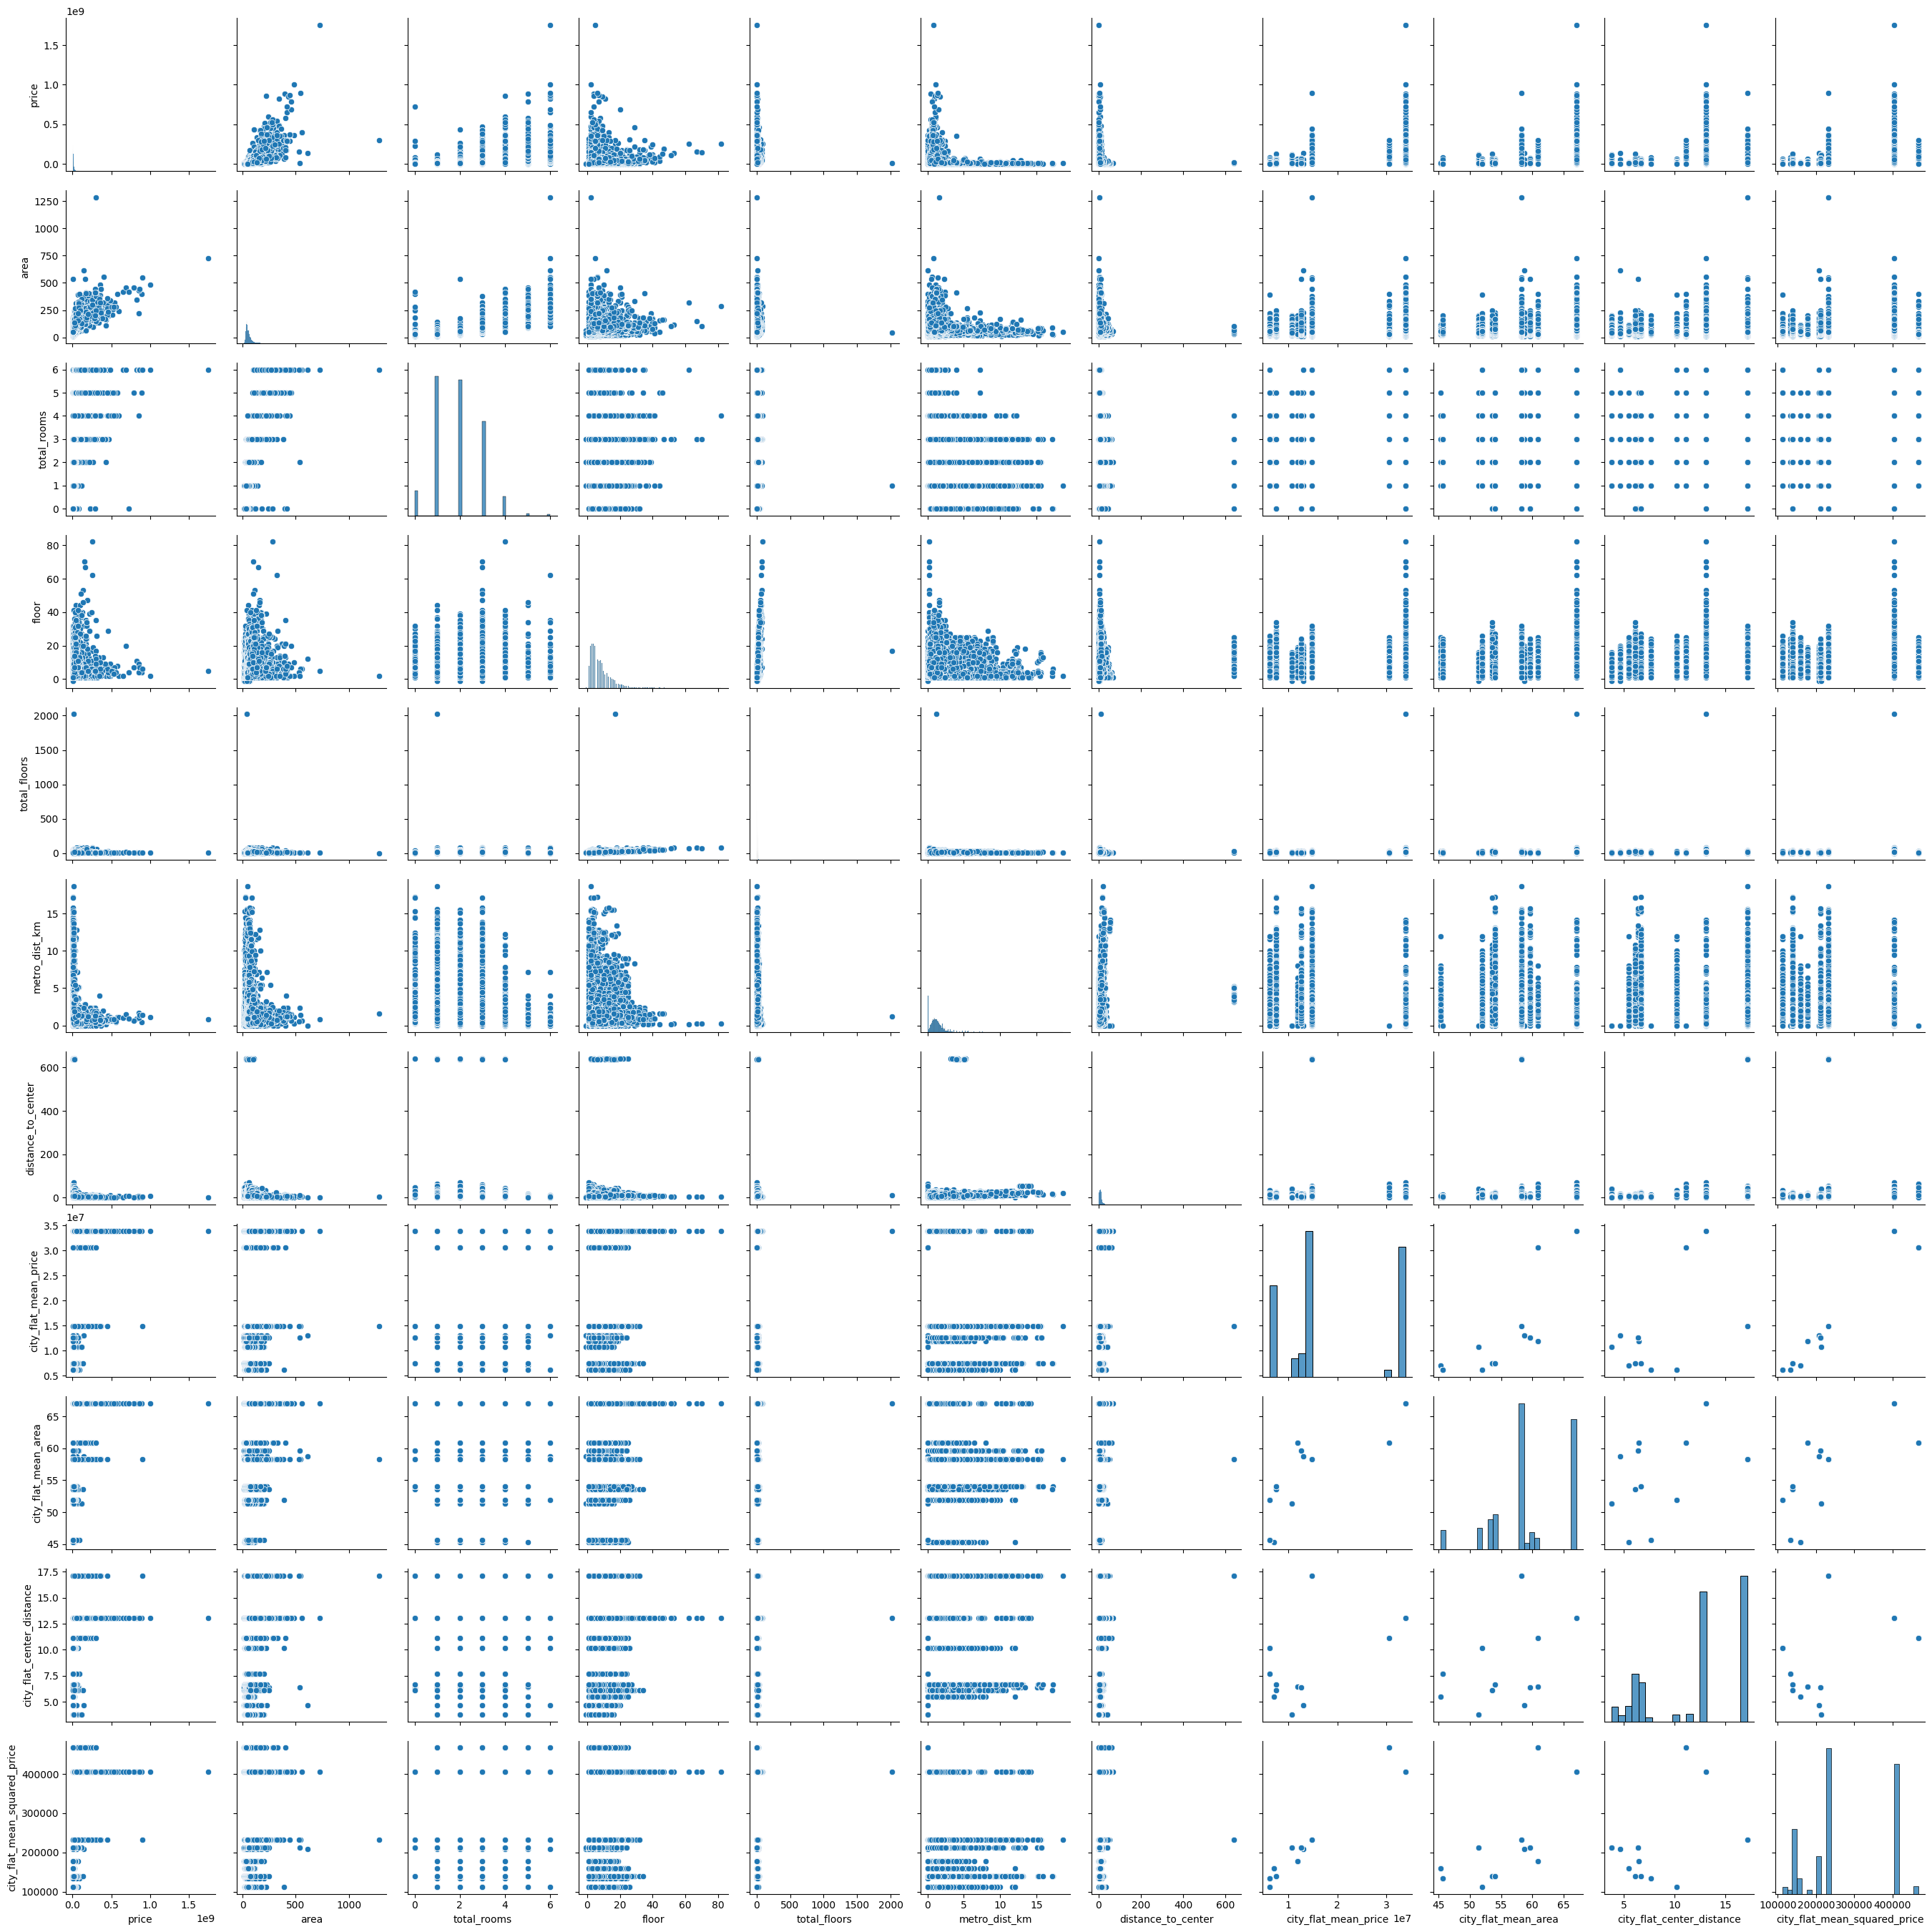

In [25]:
sns.pairplot(df)

In [27]:
count_rooms = df['total_rooms'].value_counts()
count_rooms

total_rooms
1.0    9109
2.0    8861
3.0    6135
0.0    1639
4.0    1268
5.0     129
6.0      79
Name: count, dtype: int64

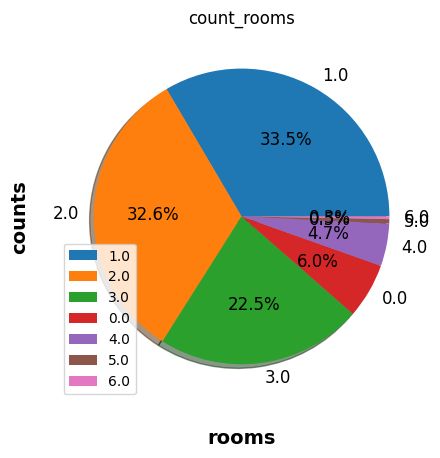

In [28]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [30]:
count_view = df['view'].value_counts()
count_view

view
garden    22571
street    14614
park       2550
water      1504
forest     1449
Name: count, dtype: int64

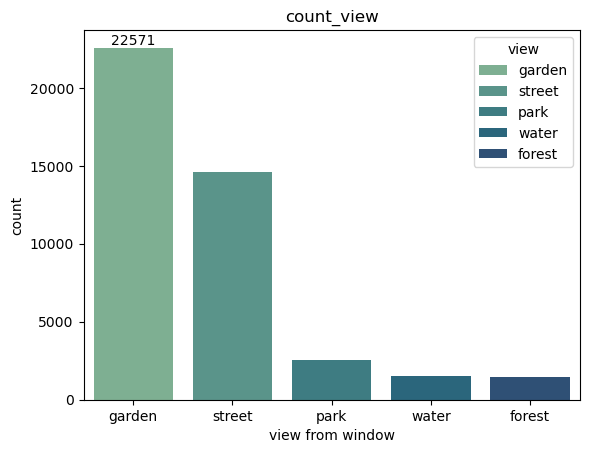

In [31]:
plt.figure()
ax = sns.barplot(x=count_view.index, y=count_view.values, palette='crest', legend=True, hue=count_view.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('count_view')
plt.xlabel('view from window')
plt.ylabel('count')
plt.show()

In [32]:
count_city = df['city'].value_counts()
count_city

city
Санкт-Петербург    12741
Москва             11041
Сочи                4172
Краснодар           4035
Новосибирск         3140
Балашиха            2077
Екатеринбург        1444
Геленджик           1223
Нижний Новгород      973
Анапа                933
Самара               462
Казань               447
Name: count, dtype: int64

In [33]:
count_type_perec = df['type_perec'].value_counts()
count_type_perec

type_perec
Монолитный             39050
Кирпичный               1375
Панельный               1007
Монолитно-кирпичный      689
Деревянный               283
Блочный                  246
Старый фонд               30
Сталинский                 8
Name: count, dtype: int64

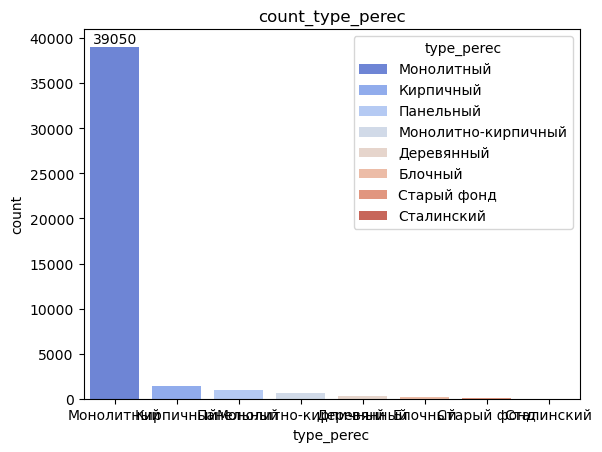

In [34]:
plt.figure()
ax = sns.barplot(x = count_type_perec.index,y = count_type_perec.values, palette='coolwarm', legend=True, hue=count_type_perec.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_type_perec')
plt.xlabel('type_perec')
plt.ylabel('count')
plt.show()

In [35]:
count_hot_water = df['hot_water'].value_counts()
count_hot_water

hot_water
Центральное                                              40967
Поквартирный котел                                         681
Закрытая с приготовлением горячей воды на ЦТП              668
Газовая колонка                                            150
Закрытая с приготовлением горячей воды на ИТП              136
Автономная котельная (крышная встроенно-пристроенная)       86
Name: count, dtype: int64

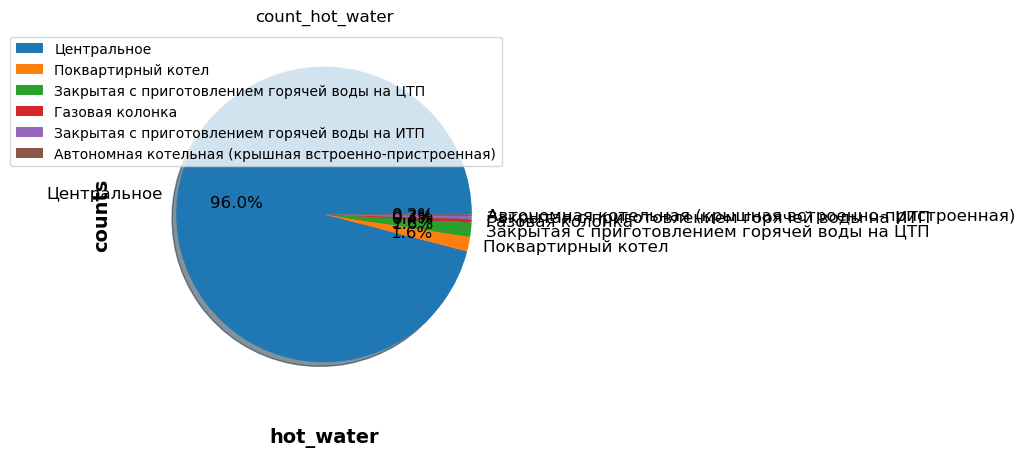

In [36]:
plt.figure()
explode = (0,0.09)
count_hot_water.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_hot_water')
plt.xlabel('hot_water', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_hot_water.index, loc = "best")
plt.show()

In [37]:
count_remont = df['remont'].value_counts()
count_remont

remont
well_done         15148
standard          13474
design             7837
without_repair     6176
simple               53
Name: count, dtype: int64

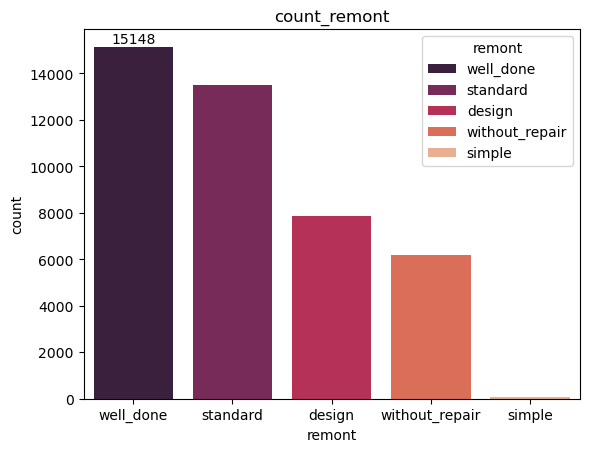

In [38]:
plt.figure()
ax = sns.barplot(x=count_remont.index,y=count_remont.values, palette='rocket', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

In [43]:
df

,city,price,area,kitchen_area,total_rooms,floor,total_floors,build_date,material_type,remont,total_balcony,metro_name,metro_dist_km,distance_to_center,city_flat_mean_price,city_flat_mean_area,city_flat_center_distance,city_flat_mean_squared_price
13,Анапа,5658000.0,77.0,8.0,2.0,3.0,10.0,2013,monolith,empty,0,NaN,0.00,1.987605,1.303511e+07,58.714002,4.640753,207991.737911
21,Анапа,7700000.0,56.1,28.0,1.0,20.0,21.0,2018,monolith,empty,0,NaN,0.00,2.900801,1.303511e+07,58.714002,4.640753,207991.737911
23,Анапа,7700000.0,67.7,10.7,3.0,1.0,5.0,2008,monolithBrick,empty,1,NaN,0.00,3.611164,1.303511e+07,58.714002,4.640753,207991.737911
28,Анапа,5800000.0,37.8,10.1,1.0,1.0,16.0,2017,block,empty,1,NaN,0.00,3.331211,1.303511e+07,58.714002,4.640753,207991.737911
31,Анапа,6500000.0,40.4,10.0,1.0,3.0,6.0,2010,monolith,empty,0,NaN,0.00,1.046543,1.303511e+07,58.714002,4.640753,207991.737911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39151,Санкт-Петербург,6500000.0,48.5,9.7,4.0,1.0,5.0,1960.0,panel,standard,1.0,Автово,0.91,8.512609,1.485679e+07,58.248791,17.128460,232070.745585
39152,Санкт-Петербург,73000000.0,154.4,30.88,4.0,11.0,14.0,2014.0,brick_monolith,design,1.0,NaN,NaN,5.482606,1.485679e+07,58.248791,17.128460,232070.745585
39153,Санкт-Петербург,30000000.0,110.0,22.0,4.0,25.0,25.0,2012.0,brick_monolith,well_done,1.0,Гражданский проспект,1.14,12.379187,1.485679e+07,58.248791,17.128460,232070.745585
39154,Санкт-Петербург,69500000.0,221.6,44.32,4.0,7.0,8.0,2006.0,brick_monolith,well_done,1.0,Площадь Восстания,1.37,3.184565,1.485679e+07,58.248791,17.128460,232070.745585


, # Encoding Data :bomb:

In [63]:
df = df.dropna()

In [66]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16609 entries, 1228 to 39155
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          16609 non-null  object 
 1   price                         16609 non-null  float64
 2   area                          16609 non-null  float64
 3   kitchen_area                  16609 non-null  object 
 4   total_rooms                   16609 non-null  float64
 5   floor                         16609 non-null  float64
 6   total_floors                  16609 non-null  float64
 7   build_date                    16609 non-null  object 
 8   material_type                 16609 non-null  object 
 9   remont                        16609 non-null  object 
 10  total_balcony                 16609 non-null  object 
 11  metro_name                    16609 non-null  object 
 12  metro_dist_km                 16609 non-null  float64
 13  dis

In [67]:
df[['city', 'kitchen_area','build_date','material_type','remont','total_balcony','metro_name']] = df[['city', 'kitchen_area','build_date','material_type','remont','total_balcony','metro_name']].astype('str')

In [68]:
le = OneHotEncoder()
encoder = le.fit_transform(df[["city", 'material_type', 'remont', 'total_balcony', 'metro_name']])
encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 83045 stored elements and shape (16609, 452)>

In [69]:
plt.figure()
sns.heatmap(df.corr(), cmap='crest', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

ValueError: could not convert string to float: 'Салтыковская'

<Figure size 640x480 with 0 Axes>

In [54]:
df.info()

AttributeError: 'function' object has no attribute 'info'

# :star: Features & Target :dart: 

In [70]:
x = df.drop(columns=['price'])
y = df['price']


In [71]:
y

1228      6800000.0
1230      8500000.0
1232     10850000.0
1234      6700000.0
1236      8850000.0
            ...    
39150    51700000.0
39151     6500000.0
39153    30000000.0
39154    69500000.0
39155    20500000.0
Name: price, Length: 16609, dtype: float64

In [72]:
y=y.values.reshape(-1,1)
y

array([[ 6800000.],
       [ 8500000.],
       [10850000.],
       ...,
       [30000000.],
       [69500000.],
       [20500000.]])

# :mag: Scaling and split :scissors:

In [73]:
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# x = scaler_x.fit_transform(x)
# y = scaler_y.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
# joblib.dump(scaler_x, "../../scalers/alpha1_x.bin")
# joblib.dump(scaler_y, "../../scalers/alpha1_y.bin")

In [74]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16609 entries, 1228 to 39155
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   city                          16609 non-null  object 
 1   area                          16609 non-null  float64
 2   kitchen_area                  16609 non-null  object 
 3   total_rooms                   16609 non-null  float64
 4   floor                         16609 non-null  float64
 5   total_floors                  16609 non-null  float64
 6   build_date                    16609 non-null  object 
 7   material_type                 16609 non-null  object 
 8   remont                        16609 non-null  object 
 9   total_balcony                 16609 non-null  object 
 10  metro_name                    16609 non-null  object 
 11  metro_dist_km                 16609 non-null  float64
 12  distance_to_center            16609 non-null  float64
 13  cit

# Teach Models :books:

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 

In [76]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Москва'

In [ ]:
model = CatBoostRegressor(cat_features=[3, 6, 7, 8, 9, 10], iterations=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Results for CatBoost:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)
print()

# Save the best model :floppy_disk:

In [ ]:
# name = Name[accuracy.index(max(accuracy))]
# model = models[Name[accuracy.index(max(accuracy))]]
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
    
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
    
# print(f"Results for {name}:")
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Error (MAE):", mae)
# print("R-squared Score:", r2)

model.save_model("../../models/alpha1.bin")


In [ ]:
model.feature_importances_

# Test the best model :triangular_ruler:

# Import test dataset :scroll:

In [ ]:
x_plus = pd.read_csv("../../src/predict_test.csv")

In [ ]:
x_plus

In [ ]:
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    x_plus[column]=le.fit_transform(x_plus[column])
    
x_plus = scaler_x.fit_transform(x_plus)

In [ ]:
y_pred_plus = model.predict(x_plus)
y_pred_plus

In [ ]:
[y_pred_plus]

In [ ]:
y_pred_plus = scaler_y.inverse_transform([y_pred_plus])
ceil(y_pred_plus[0][0])